In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

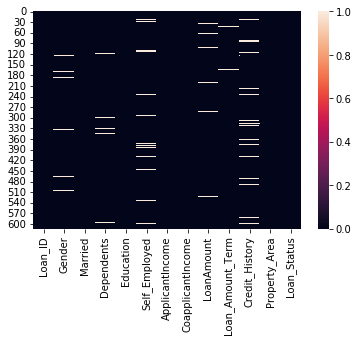

In [6]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

null data is present in the dataset

In [7]:
#Statisticial Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


1. count is not same for all the columns as data is missing
2. mean is greater than 50% in all the columns except loan amount term column
3. huge difference between the 75% and max in all the columns except credit history column

In [8]:
#Exploring target data variable
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

There are only 2variables in target column. hence we are going to use logistic regression

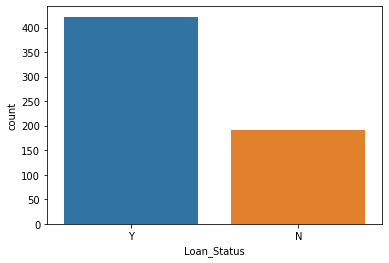

In [9]:
#checking income column value
sns.countplot(x='Loan_Status', data=df);

dataset is imbalanced as the count for Y and count for N is not equal

In [10]:
#filling the missing values in dataset

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

imp=SimpleImputer(strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no missing data in dataset

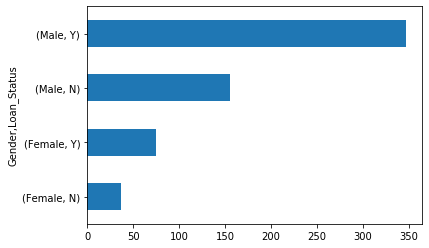

In [12]:
df.groupby(["Gender","Loan_Status"])["Loan_Status"].count().plot(kind = "barh")

maximum loan applications are made by male and they have got acceptance as compare to female

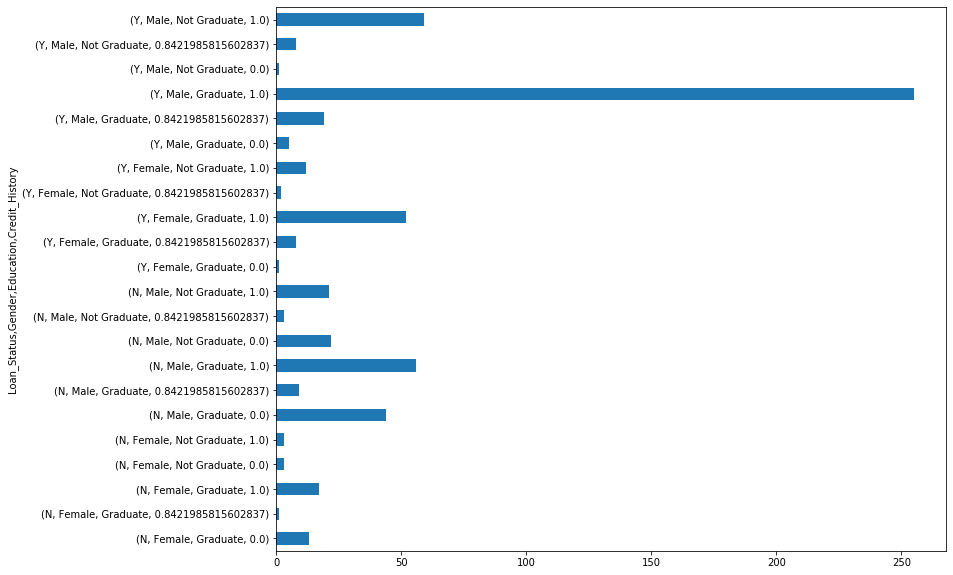

In [13]:
plt.figure(figsize=(12,10))
df.groupby(["Loan_Status","Gender","Education","Credit_History"])["Loan_Status"].count().plot(kind = "barh")

maximum apllications are from the graduates  males with good credit history and loan has got approved too

In [14]:
#checking skewness
df.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -1.963600
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

skewness is present 

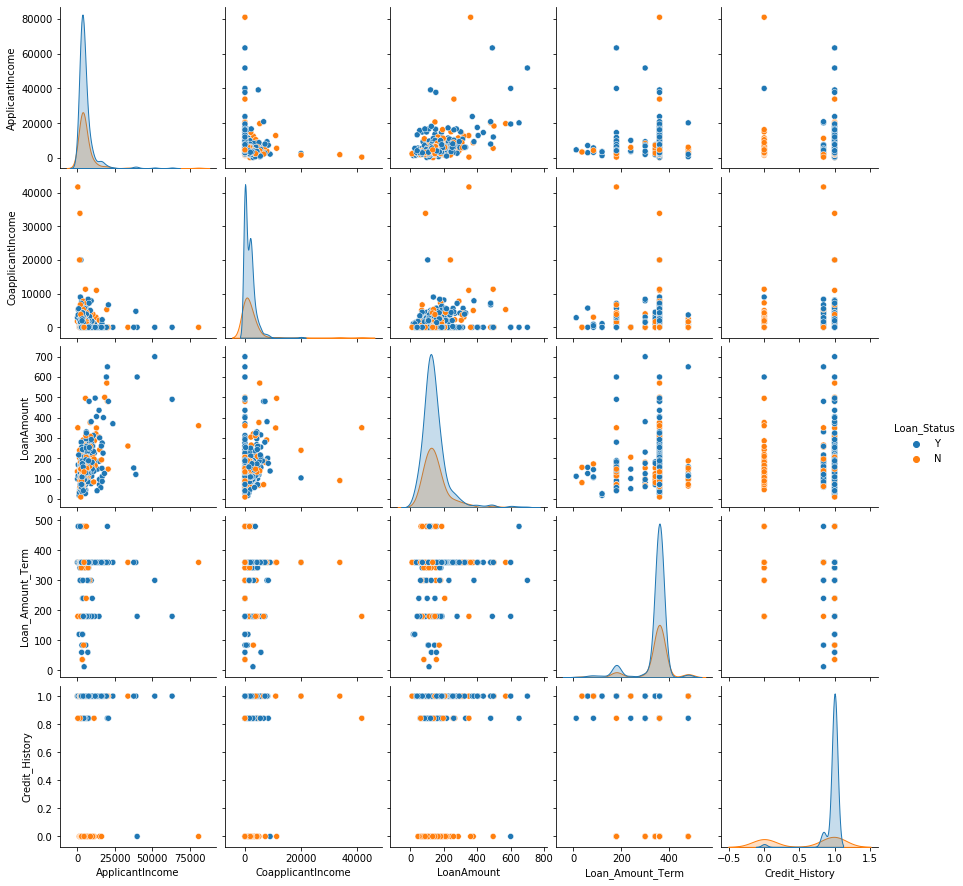

In [15]:
# pairplot of the datasets
sns.pairplot(df,hue='Loan_Status',diag_kind='kde')

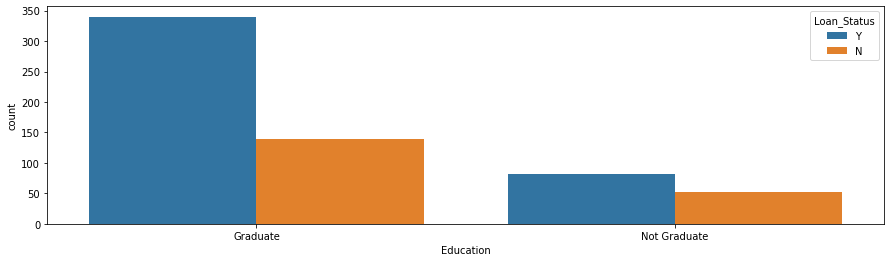

In [16]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Education',hue="Loan_Status", data=df)

garduate people are getting maximum loan approvals

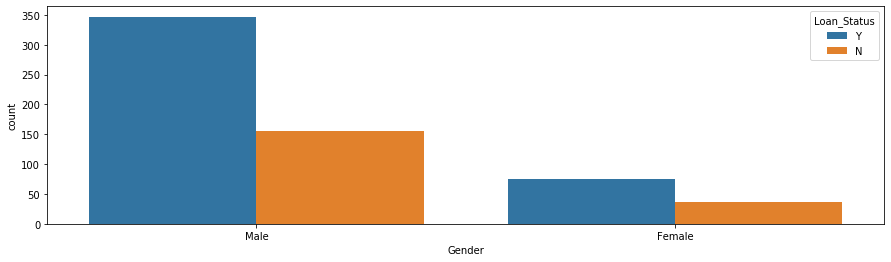

In [17]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Gender',hue="Loan_Status", data=df)

maximum loan approvals are for males

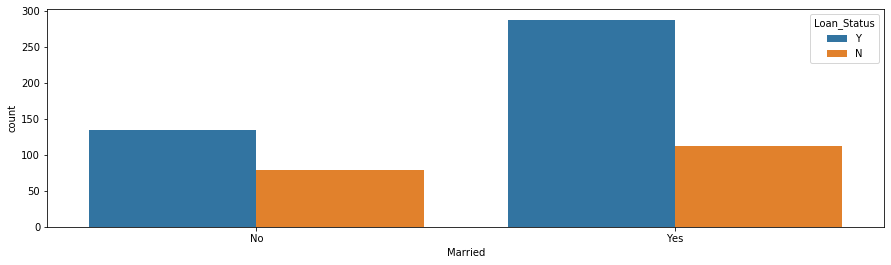

In [18]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Married',hue="Loan_Status", data=df)

married people are getting maximum loan approvals

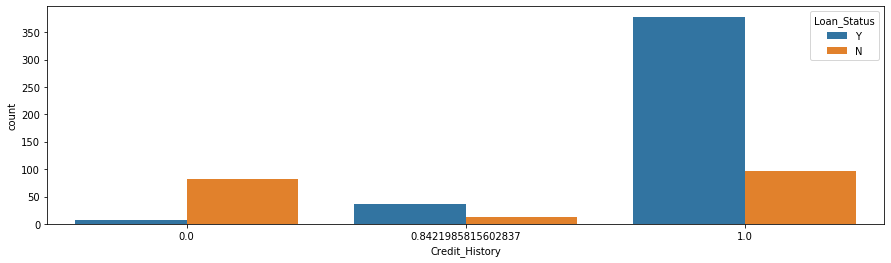

In [19]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Credit_History',hue="Loan_Status", data=df)

people with good credit history gets loan

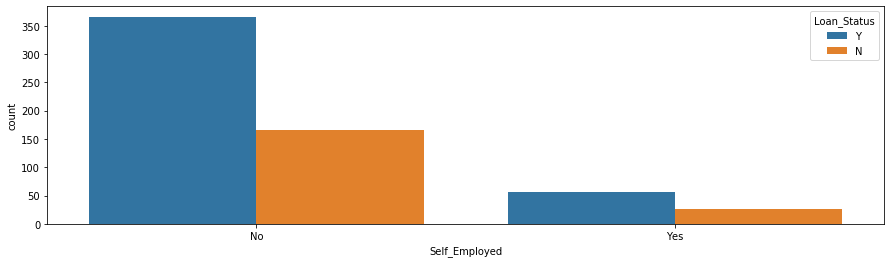

In [20]:
plt.subplots(figsize=(15,4))
sns.countplot(x='Self_Employed',hue="Loan_Status", data=df)

maximum people are not self employed but still their loan is getting approved

In [21]:
#coverting string data into integer data using LabelEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['Loan_ID','Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [22]:
#checking correlation
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


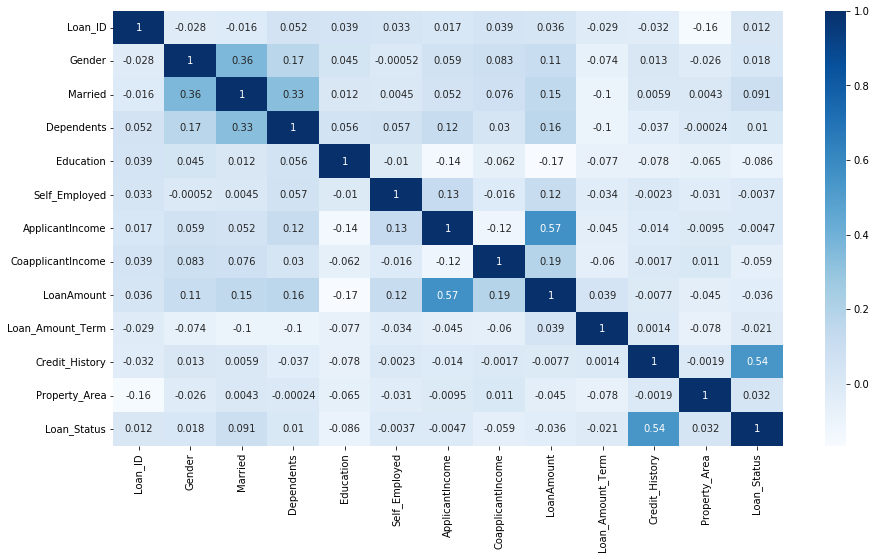

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(dfcor,cmap="Blues",annot=True)

loan status is highly correlated with credit history column and with rest all the columns it is not much correlated.

Loan_ID                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
Gender               AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Married              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Dependents           AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Education            AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Self_Employed        AxesSubplot(0.789286,0.772143;0.110714x0.107857)
ApplicantIncome         AxesSubplot(0.125,0.642714;0.110714x0.107857)
CoapplicantIncome    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
LoanAmount           AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Loan_Amount_Term     AxesSubplot(0.523571,0.642714;0.110714x0.107857)
Credit_History       AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Property_Area        AxesSubplot(0.789286,0.642714;0.110714x0.107857)
Loan_Status             AxesSubplot(0.125,0.513286;0.110714x0.107857)
dtype: object

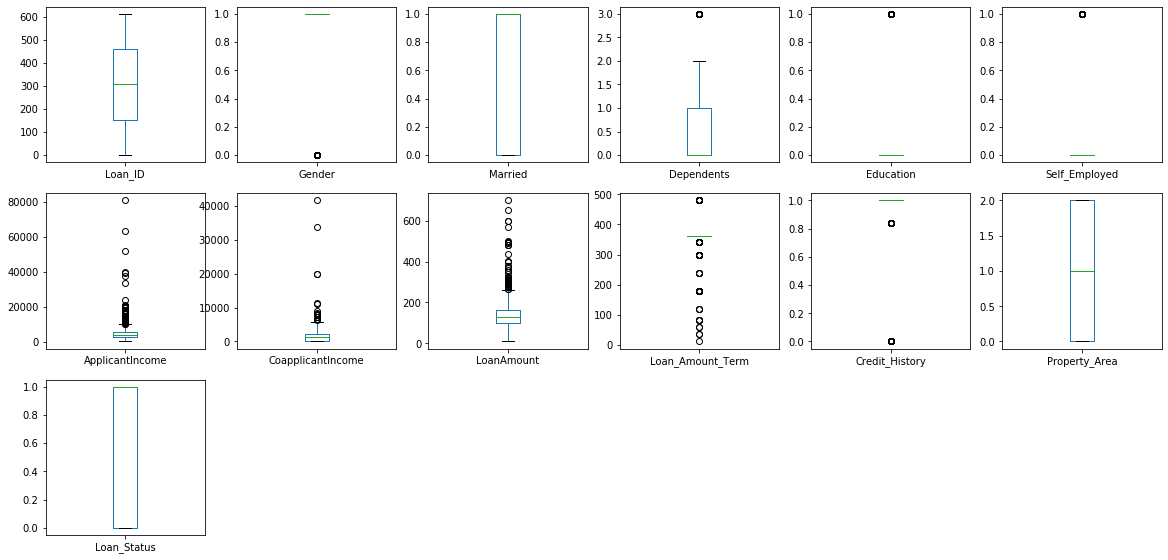

In [24]:
#finding outliers
df.plot(kind='box',subplots=True,figsize=(20,20),layout=(6,6))

outliers are present

In [25]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,1:]))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.45164045, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [26]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [27]:
dfnew=df[(z<3).all(axis=1)]
dfnew

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


37rows are dropped

In [28]:
#separating data
x=dfnew.iloc[:,0:-1]
y=dfnew.iloc[:,-1]

In [29]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [30]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [32]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [33]:
x_train=st.fit_transform(x_train)
x_train

array([[ 1.23738876,  0.47065804,  0.74175522, ...,  0.24048592,
        -2.43303585, -0.0727759 ],
       [-1.65163226,  0.47065804,  0.74175522, ...,  0.24048592,
         0.4510293 ,  1.20411038],
       [-0.71386536,  0.47065804,  0.74175522, ..., -3.19757208,
         0.4510293 , -0.0727759 ],
       ...,
       [-0.11392753,  0.47065804, -1.34815364, ...,  0.24048592,
         0.4510293 , -1.34966219],
       [ 0.89955969,  0.47065804,  0.74175522, ...,  0.24048592,
         0.4510293 , -0.0727759 ],
       [-1.15653794,  0.47065804,  0.74175522, ...,  0.24048592,
         0.4510293 ,  1.20411038]])

In [34]:
x_test=st.transform(x_test)
x_test

array([[-1.06334371, -2.12468485, -1.34815364, ...,  0.24048592,
        -2.43303585, -0.0727759 ],
       [ 0.63745092, -2.12468485,  0.74175522, ...,  0.24048592,
        -2.43303585, -0.0727759 ],
       [ 1.39465401, -2.12468485,  0.74175522, ...,  0.24048592,
        -0.00408027, -0.0727759 ],
       ...,
       [-0.91190309, -2.12468485, -1.34815364, ...,  0.24048592,
         0.4510293 , -1.34966219],
       [ 1.6451135 , -2.12468485, -1.34815364, ...,  0.24048592,
         0.4510293 , -0.0727759 ],
       [-1.73317721,  0.47065804,  0.74175522, ...,  0.24048592,
        -2.43303585, -0.0727759 ]])

In [35]:
x_train.mean()

-1.9366584712804975e-17

In [36]:
x_train.std()

1.0

In [37]:
# Regularization:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.3047421519699016


array([ 0.01248293, -0.02048627,  0.04286135,  0.00057113, -0.03683713,
       -0.02657295,  0.00904648,  0.03038921, -0.02370288, -0.02089294,
        0.24120786,  0.00744932])

In [38]:
#using randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier()
f.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
f.score(x_train,y_train)

1.0

In [43]:
p=confusion_matrix(y_test,f.predict(x_test))
p

array([[13, 22],
       [26, 55]], dtype=int64)

In [44]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [45]:
lg=LogisticRegression()

In [46]:
lg.fit(x_train,y_train)

LogisticRegression()

In [47]:
pred=lg.predict(x_test)

In [48]:
pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1])

In [49]:
accuracy_score(y_test,pred)

0.8017241379310345

In [50]:
p=confusion_matrix(y_test,pred)
p

array([[14, 21],
       [ 2, 79]], dtype=int64)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55        35
           1       0.79      0.98      0.87        81

    accuracy                           0.80       116
   macro avg       0.83      0.69      0.71       116
weighted avg       0.82      0.80      0.78       116



In [52]:
#cross validation
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lg)

In [53]:
for j in range(4,10):
    lsscore= cross_val_score(lg,x,y,cv=j)
    print(lsscore)
    lsc=lsscore.mean()
    print('at cv:-',j)
    print("cross validation score is:", lss*100)
    print("accuracy score is",lss*100)
    print("\n")

[0.8137931  0.75694444 0.83333333 0.80555556]
at cv:- 4
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344


[0.78448276 0.77586207 0.77391304 0.86956522 0.8173913 ]
at cv:- 5
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344


[0.83505155 0.79166667 0.77083333 0.82291667 0.84375    0.82291667]
at cv:- 6
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344


[0.8313253  0.74698795 0.74698795 0.80487805 0.86585366 0.84146341
 0.84146341]
at cv:- 7
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344


[0.82191781 0.80555556 0.76388889 0.79166667 0.80555556 0.875
 0.79166667 0.86111111]
at cv:- 8
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344


[0.81538462 0.828125   0.765625   0.75       0.78125    0.828125
 0.875      0.78125    0.875     ]
at cv:- 9
cross validation score is: 80.17241379310344
accuracy score is 80.17241379310344




In [54]:
lsscore_selected= cross_val_score(lg,x,y,cv=9).mean()
print("The cv score is", lsscore_selected,'\n the accuracy score is',lss)

The cv score is 0.8110844017094017 
 the accuracy score is 0.8017241379310345


In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
lg

LogisticRegression()

In [57]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train= algorithm_instance.predict(x_train)
    model_1_pred_test= algorithm_instance.predict(x_test)
    print("accuracy of training model:",accuracy_score(y_train,model_1_pred_train))
    print("accuracy of testing model:",accuracy_score(y_test,model_1_pred_test))
    print("classification report for test data \n",classification_report(y_test,model_1_pred_test))
    print("classification report for train data \n",classification_report(y_train,model_1_pred_train))
    print("confusion matrix: \n", confusion_matrix(y_test,model_1_pred_test))

In [58]:
model_selection(lg,x_train,y_train, x_test,y_test)

accuracy of training model: 0.824295010845987
accuracy of testing model: 0.8017241379310345
classification report for test data 
               precision    recall  f1-score   support

           0       0.88      0.40      0.55        35
           1       0.79      0.98      0.87        81

    accuracy                           0.80       116
   macro avg       0.83      0.69      0.71       116
weighted avg       0.82      0.80      0.78       116

classification report for train data 
               precision    recall  f1-score   support

           0       0.94      0.47      0.62       144
           1       0.80      0.99      0.89       317

    accuracy                           0.82       461
   macro avg       0.87      0.73      0.75       461
weighted avg       0.85      0.82      0.80       461

confusion matrix: 
 [[14 21]
 [ 2 79]]


In [59]:
#saving the best model
import pickle
filename='Loan.pkl'
pickle.dump(lg, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1])

In [60]:
#conclusion
result=loaded_model.score(x_test,y_test)
print(result*100)

80.17241379310344


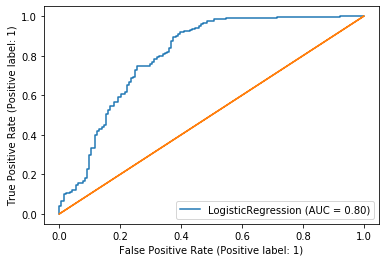

In [64]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(loaded_model,x_train,y_train)
plt.plot(y_train,y_train)